In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder

wine_data = pd.read_csv("winequality-red.csv", sep=",")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
display(wine_data.describe())
wine_data['quality'].value_counts()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [3]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Preprocessing

In [4]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(wine_data))
print(z.shape)

(1599, 12)


In [5]:
threshold = 3
wine_data = wine_data[(z < threshold).all(axis=1)]
wine_data.shape

(1451, 12)

In [6]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=12)
x = wine_data.drop(['quality'] , axis = 1)
wd = pd.get_dummies(wine_data)
model.fit(x, wine_data.quality)
display(model.feature_importances_)

array([0.04197691, 0.10182017, 0.06032171, 0.05195373, 0.06338062,
       0.03991618, 0.08013138, 0.04856052, 0.0586216 , 0.14883862,
       0.30447857])

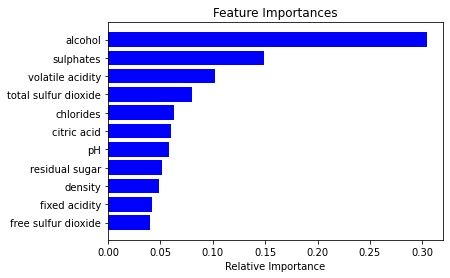

In [7]:
features = wd.columns
importances = model.feature_importances_
indices = np.argsort(importances)[:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [8]:
del x['chlorides']
del x['pH']
del x['free sulfur dioxide']



In [9]:
from collections import Counter

le = LabelEncoder()
y = le.fit_transform(wine_data.iloc[: , -1]) # in row form
print(Counter(y))
y = pd.DataFrame(y.reshape(len(y),1)) 

Counter({1: 617, 2: 586, 3: 185, 0: 47, 4: 16})


In [10]:
x.shape

(1451, 8)

In [11]:
from imblearn.over_sampling import SMOTE

sample_size = 1700
oversample = SMOTE(sampling_strategy={0: sample_size, 1: sample_size, 2: sample_size, 3: sample_size, 4: sample_size})
x, y = oversample.fit_resample(x, y)

C:\Users\Francis Dave\AppData\Roaming\Python\Python39\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (1700) in class 0 will be larger than the number of samples in the majority class (class #1 -> 617)
  warnings.warn(
C:\Users\Francis Dave\AppData\Roaming\Python\Python39\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (1700) in class 1 will be larger than the number of samples in the majority class (class #1 -> 617)
  warnings.warn(
C:\Users\Francis Dave\AppData\Roaming\Python\Python39\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (1700) in class 2 will be larger than the number of samples in the majority class (class #1 -> 617)
  warnings.warn(
C:\Users\Francis Dave\AppData\Roaming\Python\Python39\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (1700) in cla

In [12]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,total sulfur dioxide,density,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,34.000000,0.997800,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,67.000000,0.996800,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,54.000000,0.997000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,60.000000,0.998000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,34.000000,0.997800,0.560000,9.400000
...,...,...,...,...,...,...,...,...
8495,8.149160,0.510931,0.373221,2.354656,16.792366,0.992821,0.713771,12.975420
8496,10.323153,0.455478,0.613446,3.966088,17.971740,0.997566,0.808250,12.525979
8497,9.738938,0.380033,0.511980,2.119469,16.000000,0.995650,0.674027,11.900995
8498,7.753771,0.412416,0.358624,2.432212,27.649339,0.995271,0.750545,11.583639


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
n_classes = 6 # because we only have 6 categories
y_train_cat = tf.keras.utils.to_categorical(y_train, n_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, n_classes)

In [15]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

MOdeling

In [16]:
ann = tf.keras.models.Sequential(layers = None , name = None)

In [17]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(8,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='sigmoid'))


In [19]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 6)                 66        
                                                                 
Total params: 490
Trainable params: 490
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [21]:
history = model.fit(x_train, y_train_cat,  batch_size= 32, epochs = 150 , validation_data = (x_test, y_test_cat))

Epoch 1/150
213/213 [==============================] - 1s 2ms/step - loss: 1.6121 - accuracy: 0.3032 - val_loss: 1.2886 - val_accuracy: 0.4359
Epoch 2/150
213/213 [==============================] - 0s 1ms/step - loss: 1.1343 - accuracy: 0.4694 - val_loss: 1.0513 - val_accuracy: 0.5041
Epoch 3/150
213/213 [==============================] - 0s 896us/step - loss: 1.0351 - accuracy: 0.5262 - val_loss: 1.0115 - val_accuracy: 0.5353
Epoch 4/150
213/213 [==============================] - 0s 920us/step - loss: 0.9907 - accuracy: 0.5512 - val_loss: 0.9796 - val_accuracy: 0.5600
Epoch 5/150
213/213 [==============================] - 0s 962us/step - loss: 0.9596 - accuracy: 0.5853 - val_loss: 0.9571 - val_accuracy: 0.5988
Epoch 6/150
213/213 [==============================] - 0s 906us/step - loss: 0.9332 - accuracy: 0.6000 - val_loss: 0.9293 - val_accuracy: 0.6071
Epoch 7/150
213/213 [==============================] - 0s 910us/step - loss: 0.9084 - accuracy: 0.6128 - val_loss: 0.9054 - val_accura

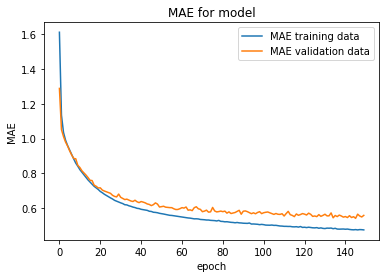

In [22]:
plt.plot(history.history['loss'], label='MAE training data')
plt.plot(history.history['val_loss'], label='MAE validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

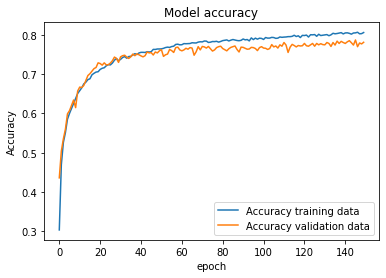

In [23]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()